In [2]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', size=12)
plt.rc('axes', labelsize=12)

In [3]:
import pandas as pd

# Arbre de classification

On utilise les données 
Titanic kaggle
https://www.kaggle.com/akshaysehgal/d/prkukunoor/TitanicDataset/how-to-group-by-aggregate-using-py

## Chargement et clarification des données

In [4]:
df = pd.read_csv('./titanic_train.csv')

In [5]:
# Crée une variable catégorique (Oui/Non) plutôt que continue (Age)
df['Child'] = df['Age'].dropna()<14

In [6]:
# Supprime les données, pour le moment, non nécessaire
df = df.drop(['PassengerId', 'Ticket', 'Embarked', 'Fare', 'SibSp',  'Parch', 'Name', 'Age'] , axis=1)

In [8]:
# Combien de données valides par variables:
print( df.count() )

Survived    891
Pclass      891
Sex         891
Cabin       204
Child       714
dtype: int64


In [7]:
df[ df['Cabin'].isnull()==False ]

,Survived,Pclass,Sex,Cabin,Child
1,1,1,female,C85,False
3,1,1,female,C123,False
6,0,1,male,E46,False
10,1,3,female,G6,True
11,1,1,female,C103,False
21,1,2,male,D56,False
23,1,1,male,A6,False
27,0,1,male,C23 C25 C27,False
31,1,1,female,B78,NaN
52,1,1,female,D33,False


In [92]:
df[ df['Pclass']==1 & df['Survived'] ]

,Survived,Pclass,Sex,Cabin,Child
1,1,1,female,C85,False
3,1,1,female,C123,False
11,1,1,female,C103,False
23,1,1,male,A6,False
31,1,1,female,B78,NaN
52,1,1,female,D33,False
55,1,1,male,C52,NaN
61,1,1,female,B28,False
88,1,1,female,C23 C25 C27,False
97,1,1,male,D10 D12,False


### Laquels des 3 variables (Class, Child, Sex) est la plus déterminantes pour estimer la Survie ?

In [51]:
f = {'Survived':{'#survive':'sum','total':'count','pourcentage':lambda x:sum(x)/x.count()}}
df.groupby(['Pclass']).agg(f)

Survived               
       pourcentage total #survive
Pclass                           
1         0.629630   216      136
2         0.472826   184       87
3         0.242363   491      119

In [52]:
# Modele simplisime :
df['output'] = df['Pclass']==1

# Score
(df['Survived']==df['output']).sum() / (df['Survived']==df['output']).count()

0.67901234567901236

## Sex

In [53]:
f = {'Survived':{'#survive':'sum','total':'count','pourcentage':lambda x:sum(x)/x.count()}}
df.groupby(['Sex']).agg(f)

Survived               
       pourcentage total #survive
Sex                              
female    0.742038   314      233
male      0.188908   577      109

In [62]:
# Modele simplisime :
df['output'] = df['Sex']=='female'

# Score
(df['Survived']==df['output']).sum() / (df['Survived']==df['output']).count()

0.78675645342312006

In [57]:
f = {'Survived':{'#survive':'sum','total':'count','pourcentage':lambda x:sum(x)/x.count()}}
df.groupby(['Child']).agg(f)

Survived               
      pourcentage total #survive
Child                           
False    0.385692   643      248
True     0.591549    71       42

## 'Pclass' et 'Sex'

In [63]:
f = {'Survived':{'#survive':'sum','total':'count','pourcentage':lambda x:sum(x)/x.count()}}
df.groupby(['Pclass','Sex', 'Child']).agg(f)

Survived               
                    pourcentage total #survive
Pclass Sex    Child                           
1      female False    0.976190    84       82
              True     0.000000     1        0
       male   False    0.377551    98       37
              True     1.000000     3        3
2      female False    0.907692    65       59
              True     1.000000     9        9
       male   False    0.066667    90        6
              True     1.000000     9        9
3      female False    0.448718    78       35
              True     0.500000    24       12
       male   False    0.127193   228       29
              True     0.360000    25        9

In [62]:
f = {'Survived':{'#survive':'sum','total':'count','pourcentage':lambda x:sum(x)/x.count()}}
df[df['Sex']=='female'].groupby(['Pclass']).agg(f)

Survived               
       pourcentage total #survive
Pclass                           
1         0.968085    94       91
2         0.921053    76       70
3         0.500000   144       72

In [113]:
# Modele double :
df['output'] = (df['Sex']=='female') & (df['Pclass']<3) 
 
# Score
(df['Survived']==df['output']).sum() / (df['Survived']==df['output']).count()

0.78675645342312006

Pas mieux que 'Sex' seul ...

## Age ?

In [78]:
df['Age'].hist?

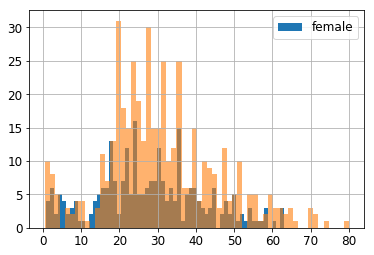

In [95]:
df[df['Sex']=='female']['Age'].hist(bins=60, label='female')
df[df['Sex']=='male']['Age'].hist(bins=60, alpha=.6)
plt.legend()

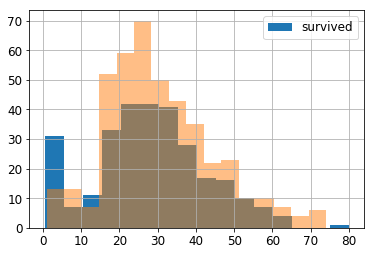

In [100]:
df[df['Survived']==1]['Age'].hist(bins=16, label='survived')
df[df['Survived']==0]['Age'].hist(bins=16, alpha=.5)
plt.legend()

In [105]:
f = {'Survived':{'#survive':'sum','total':'count','pourcentage':lambda x:sum(x)/x.count()}}
df.groupby(['Ticket']).agg(f)

Survived                  
                  #survive pourcentage total
Ticket                                      
110152                   3    1.000000     3
110413                   2    0.666667     3
110465                   0    0.000000     2
110564                   1    1.000000     1
110813                   1    1.000000     1
111240                   0    0.000000     1
111320                   0    0.000000     1
111361                   2    1.000000     2
111369                   1    1.000000     1
111426                   1    1.000000     1
111427                   1    1.000000     1
111428                   1    1.000000     1
112050                   0    0.000000     1
112052                   0    0.000000     1
112053                   1    1.000000     1
112058                   0    0.000000     1
112059                   0    0.000000     1
112277                   1    1.000000     1
112379                   0    0.000000     1
113028                   0    0.000000     1
113043                   0    0.000000     1
113050                   0    0.000000     1
113051                   0    0.000000     1
113055                   1    1.000000     1
113056                   0    0.000000     1
113059                   0    0.000000     1
113501                   0    0.000000     1
113503                   0    0.000000     1
113505                   2    1.000000     2
113509                   0    0.000000     1
...                    ...         ...   ...
SOTON/OQ 392082          0    0.000000     1
SOTON/OQ 392086          0    0.000000     1
SOTON/OQ 392089          1    1.000000     1
SOTON/OQ 392090          0    0.000000     1
STON/O 2. 3101269        1    1.000000     1
STON/O 2. 3101273        0    0.000000     1
STON/O 2. 3101274        0    0.000000     1
STON/O 2. 3101275        0    0.000000     1
STON/O 2. 3101280        0    0.000000     1
STON/O 2. 3101285        1    1.000000     1
STON/O 2. 3101286        1    1.000000     1
STON/O 2. 3101288        1    1.000000     1
STON/O 2. 3101289        1    1.000000     1
STON/O 2. 3101292        0    0.000000     1
STON/O 2. 3101293        0    0.000000     1
STON/O 2. 3101294        0    0.000000     1
STON/O2. 3101271         0    0.000000     1
STON/O2. 3101279         1    0.500000     2
STON/O2. 3101282         1    1.000000     1
STON/O2. 3101283         1    1.000000     1
STON/O2. 3101290         0    0.000000     1
SW/PP 751                1    1.000000     1
W./C. 14258              1    1.000000     1
W./C. 14263              0    0.000000     1
W./C. 6607               0    0.000000     2
W./C. 6608               0    0.000000     4
W./C. 6609               0    0.000000     1
W.E.P. 5734              0    0.000000     1
W/C 14208                0    0.000000     1
WE/P 5735                1    0.500000     2

[681 rows x 3 columns]

In [99]:
df.groupby(['Age']).count()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,output
Age,,,,,,,,,,,,
0.42,1,1,1,1,1,1,1,1,1,0,1,1
0.67,1,1,1,1,1,1,1,1,1,0,1,1
0.75,2,2,2,2,2,2,2,2,2,0,2,2
0.83,2,2,2,2,2,2,2,2,2,0,2,2
0.92,1,1,1,1,1,1,1,1,1,1,1,1
1.00,7,7,7,7,7,7,7,7,7,1,7,7
2.00,10,10,10,10,10,10,10,10,10,3,10,10
3.00,6,6,6,6,6,6,6,6,6,1,6,6
4.00,10,10,10,10,10,10,10,10,10,3,10,10


In [19]:
#Two step query to find sum of survived people, grouped by their passenger class (1 > 2 > 3)
group_survived = df.groupby(['Pclass'])
out_survived = group_survived['Survived'].sum()
print(out_survived)
print(group_survived['Survived'].count())

print(group_survived['Survived'].sum()/group_survived['Survived'].count())

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64
Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [8]:
group_survived.count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [15]:
len(df['Pclass']) - df['Pclass'].count()

0

In [116]:
df.where( df['Sex']=='female' )

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,output
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C,1.0
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S,0.0
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9.0,1.0,3.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0.0,2.0,347742,11.1333,NaN,S,0.0
9,10.0,1.0,2.0,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1.0,0.0,237736,30.0708,NaN,C,1.0


## Cabin

In [16]:
df['deck'] = df[ df['Cabin'].isnull()==False ]['Cabin'].apply( lambda x:x[0] )

In [17]:
df

,Survived,Pclass,Sex,Cabin,Child,deck
0,0,3,male,NaN,False,NaN
1,1,1,female,C85,False,C
2,1,3,female,NaN,False,NaN
3,1,1,female,C123,False,C
4,0,3,male,NaN,False,NaN
5,0,3,male,NaN,NaN,NaN
6,0,1,male,E46,False,E
7,0,3,male,NaN,True,NaN
8,1,3,female,NaN,False,NaN
9,1,2,female,NaN,False,NaN


In [18]:
df['deck'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [19]:
f = {'Survived':{'#survive':'sum','total':'count','pourcentage':lambda x:sum(x)/x.count()}}
df.groupby(['Pclass', 'deck']).agg(f)

Survived                     
               total #survive pourcentage
Pclass deck                              
1      A          15        7    0.466667
       B          47       35    0.744681
       C          59       35    0.593220
       D          29       22    0.758621
       E          25       18    0.720000
       T           1        0    0.000000
2      D           4        3    0.750000
       E           4        3    0.750000
       F           8        7    0.875000
3      E           3        3    1.000000
       F           5        1    0.200000
       G           4        2    0.500000

In [35]:
import re

def find_number( cabin ):
    matchList = re.findall('[0-9]+', cabin)
    if matchList:
        return int(matchList[0])
    else:
        return np.NaN

In [36]:
df['cabin_num'] = df[ df['Cabin'].isnull()==False ]['Cabin'].apply( lambda x:find_number(x) )

In [37]:
df

,Survived,Pclass,Sex,Cabin,Child,deck,cabin_num
0,0,3,male,NaN,False,NaN,NaN
1,1,1,female,C85,False,C,85.0
2,1,3,female,NaN,False,NaN,NaN
3,1,1,female,C123,False,C,123.0
4,0,3,male,NaN,False,NaN,NaN
5,0,3,male,NaN,NaN,NaN,NaN
6,0,1,male,E46,False,E,46.0
7,0,3,male,NaN,True,NaN,NaN
8,1,3,female,NaN,False,NaN,NaN
9,1,2,female,NaN,False,NaN,NaN


In [40]:
df['cabin_num'].unique()

array([  nan,   85.,  123.,   46.,    6.,  103.,   56.,   23.,   78.,
         33.,   30.,   52.,   28.,   83.,   73.,   31.,    5.,   10.,
         26.,  110.,   58.,  101.,   69.,   47.,   86.,    2.,   19.,
          7.,   49.,    4.,   32.,   80.,   36.,   15.,   93.,   35.,
         87.,   77.,   67.,   94.,  125.,   99.,  118.,   22.,  106.,
         65.,   54.,   57.,   34.,   18.,  124.,   91.,   40.,  128.,
         37.,   50.,   82.,   96.,   44.,  104.,  111.,   92.,   38.,
         21.,   12.,   63.,   14.,   20.,   79.,   25.,   95.,   39.,
         70.,   16.,   68.,   41.,    9.,   48.,  126.,   71.,   51.,
         62.,   24.,   90.,   45.,    8.,  121.,   11.,    3.,   17.,
        102.,   42.,  148.])

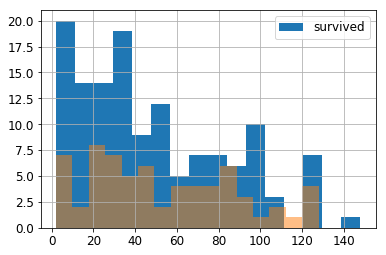

In [41]:
df[df['Survived']==1]['cabin_num'].hist(bins=16, label='survived')
df[df['Survived']==0]['cabin_num'].hist(bins=16, alpha=.5)
plt.legend()

In [43]:
34.0%2

0.0

In [49]:
df['side'] = df['cabin_num'].apply( lambda x:x%2 )

In [50]:
df

,Survived,Pclass,Sex,Cabin,Child,deck,cabin_num,side
0,0,3,male,NaN,False,NaN,NaN,NaN
1,1,1,female,C85,False,C,85.0,1.0
2,1,3,female,NaN,False,NaN,NaN,NaN
3,1,1,female,C123,False,C,123.0,1.0
4,0,3,male,NaN,False,NaN,NaN,NaN
5,0,3,male,NaN,NaN,NaN,NaN,NaN
6,0,1,male,E46,False,E,46.0,0.0
7,0,3,male,NaN,True,NaN,NaN,NaN
8,1,3,female,NaN,False,NaN,NaN,NaN
9,1,2,female,NaN,False,NaN,NaN,NaN


In [55]:
f = {'Survived':{'#survive':'sum','total':'count','pourcentage':lambda x:sum(x)/x.count()}}
df.groupby(['Sex', 'deck']).agg(f)

Survived                     
               total #survive pourcentage
Sex    deck                              
female A           1        1    1.000000
       B          27       27    1.000000
       C          27       24    0.888889
       D          18       18    1.000000
       E          15       14    0.933333
       F           5        5    1.000000
       G           4        2    0.500000
male   A          14        6    0.428571
       B          20        8    0.400000
       C          32       11    0.343750
       D          15        7    0.466667
       E          17       10    0.588235
       F           8        3    0.375000
       T           1        0    0.000000